In [4]:
from habanero import Crossref
from pprint import pprint
cr = Crossref(mailto = "htw2116@columbia.edu")

In [5]:
n = 50
journal_ISSN = "1471-2105"
journal_papers = cr.journals(ids = journal_ISSN, works = True, limit = n)

In [6]:
for paper in journal_papers["message"]["items"]:
    print("Title: " + paper["title"][0])
    print("DOI: " + paper["DOI"])
    first_author = None
    for author in paper["author"]:
        if author["sequence"] == "first":
            first_author = author["given"] + " " + author["family"]
            break
    print("First Author: " + first_author)

Title: A graph theoretic approach to utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-15-86
First Author: Gregory A Ryslik
Title: Utilizing protein structure to identify non-random somatic mutations
DOI: 10.1186/1471-2105-14-190
First Author: Gregory A Ryslik
Title: Leveraging protein quaternary structure to identify oncogenic driver mutations
DOI: 10.1186/s12859-016-0963-3
First Author: Gregory A. Ryslik
Title: A spatial simulation approach to account for protein structure when identifying non-random somatic mutations
DOI: 10.1186/1471-2105-15-231
First Author: Gregory A Ryslik
Title: eNetXplorer: an R package for the quantitative exploration of elastic net families for generalized linear models
DOI: 10.1186/s12859-019-2778-5
First Author: Julián Candia
Title: Effect of stochasticity on coinfection dynamics of respiratory viruses
DOI: 10.1186/s12859-019-2793-6
First Author: Lubna Pinky
Title: ProPhylo: partial phylogenetic profiling to guide 

In [7]:
from graph_tool.all import *

journal_graph = Graph()
vertex_id = journal_graph.new_vertex_property("string")

journal_root = journal_graph.add_vertex()
vertex_id[journal_root] = journal_ISSN

for paper in journal_papers["message"]["items"]:
    paper_vertex = journal_graph.add_vertex()
    vertex_id[paper_vertex] = paper["DOI"]
    journal_graph.add_edge(paper_vertex, journal_root)

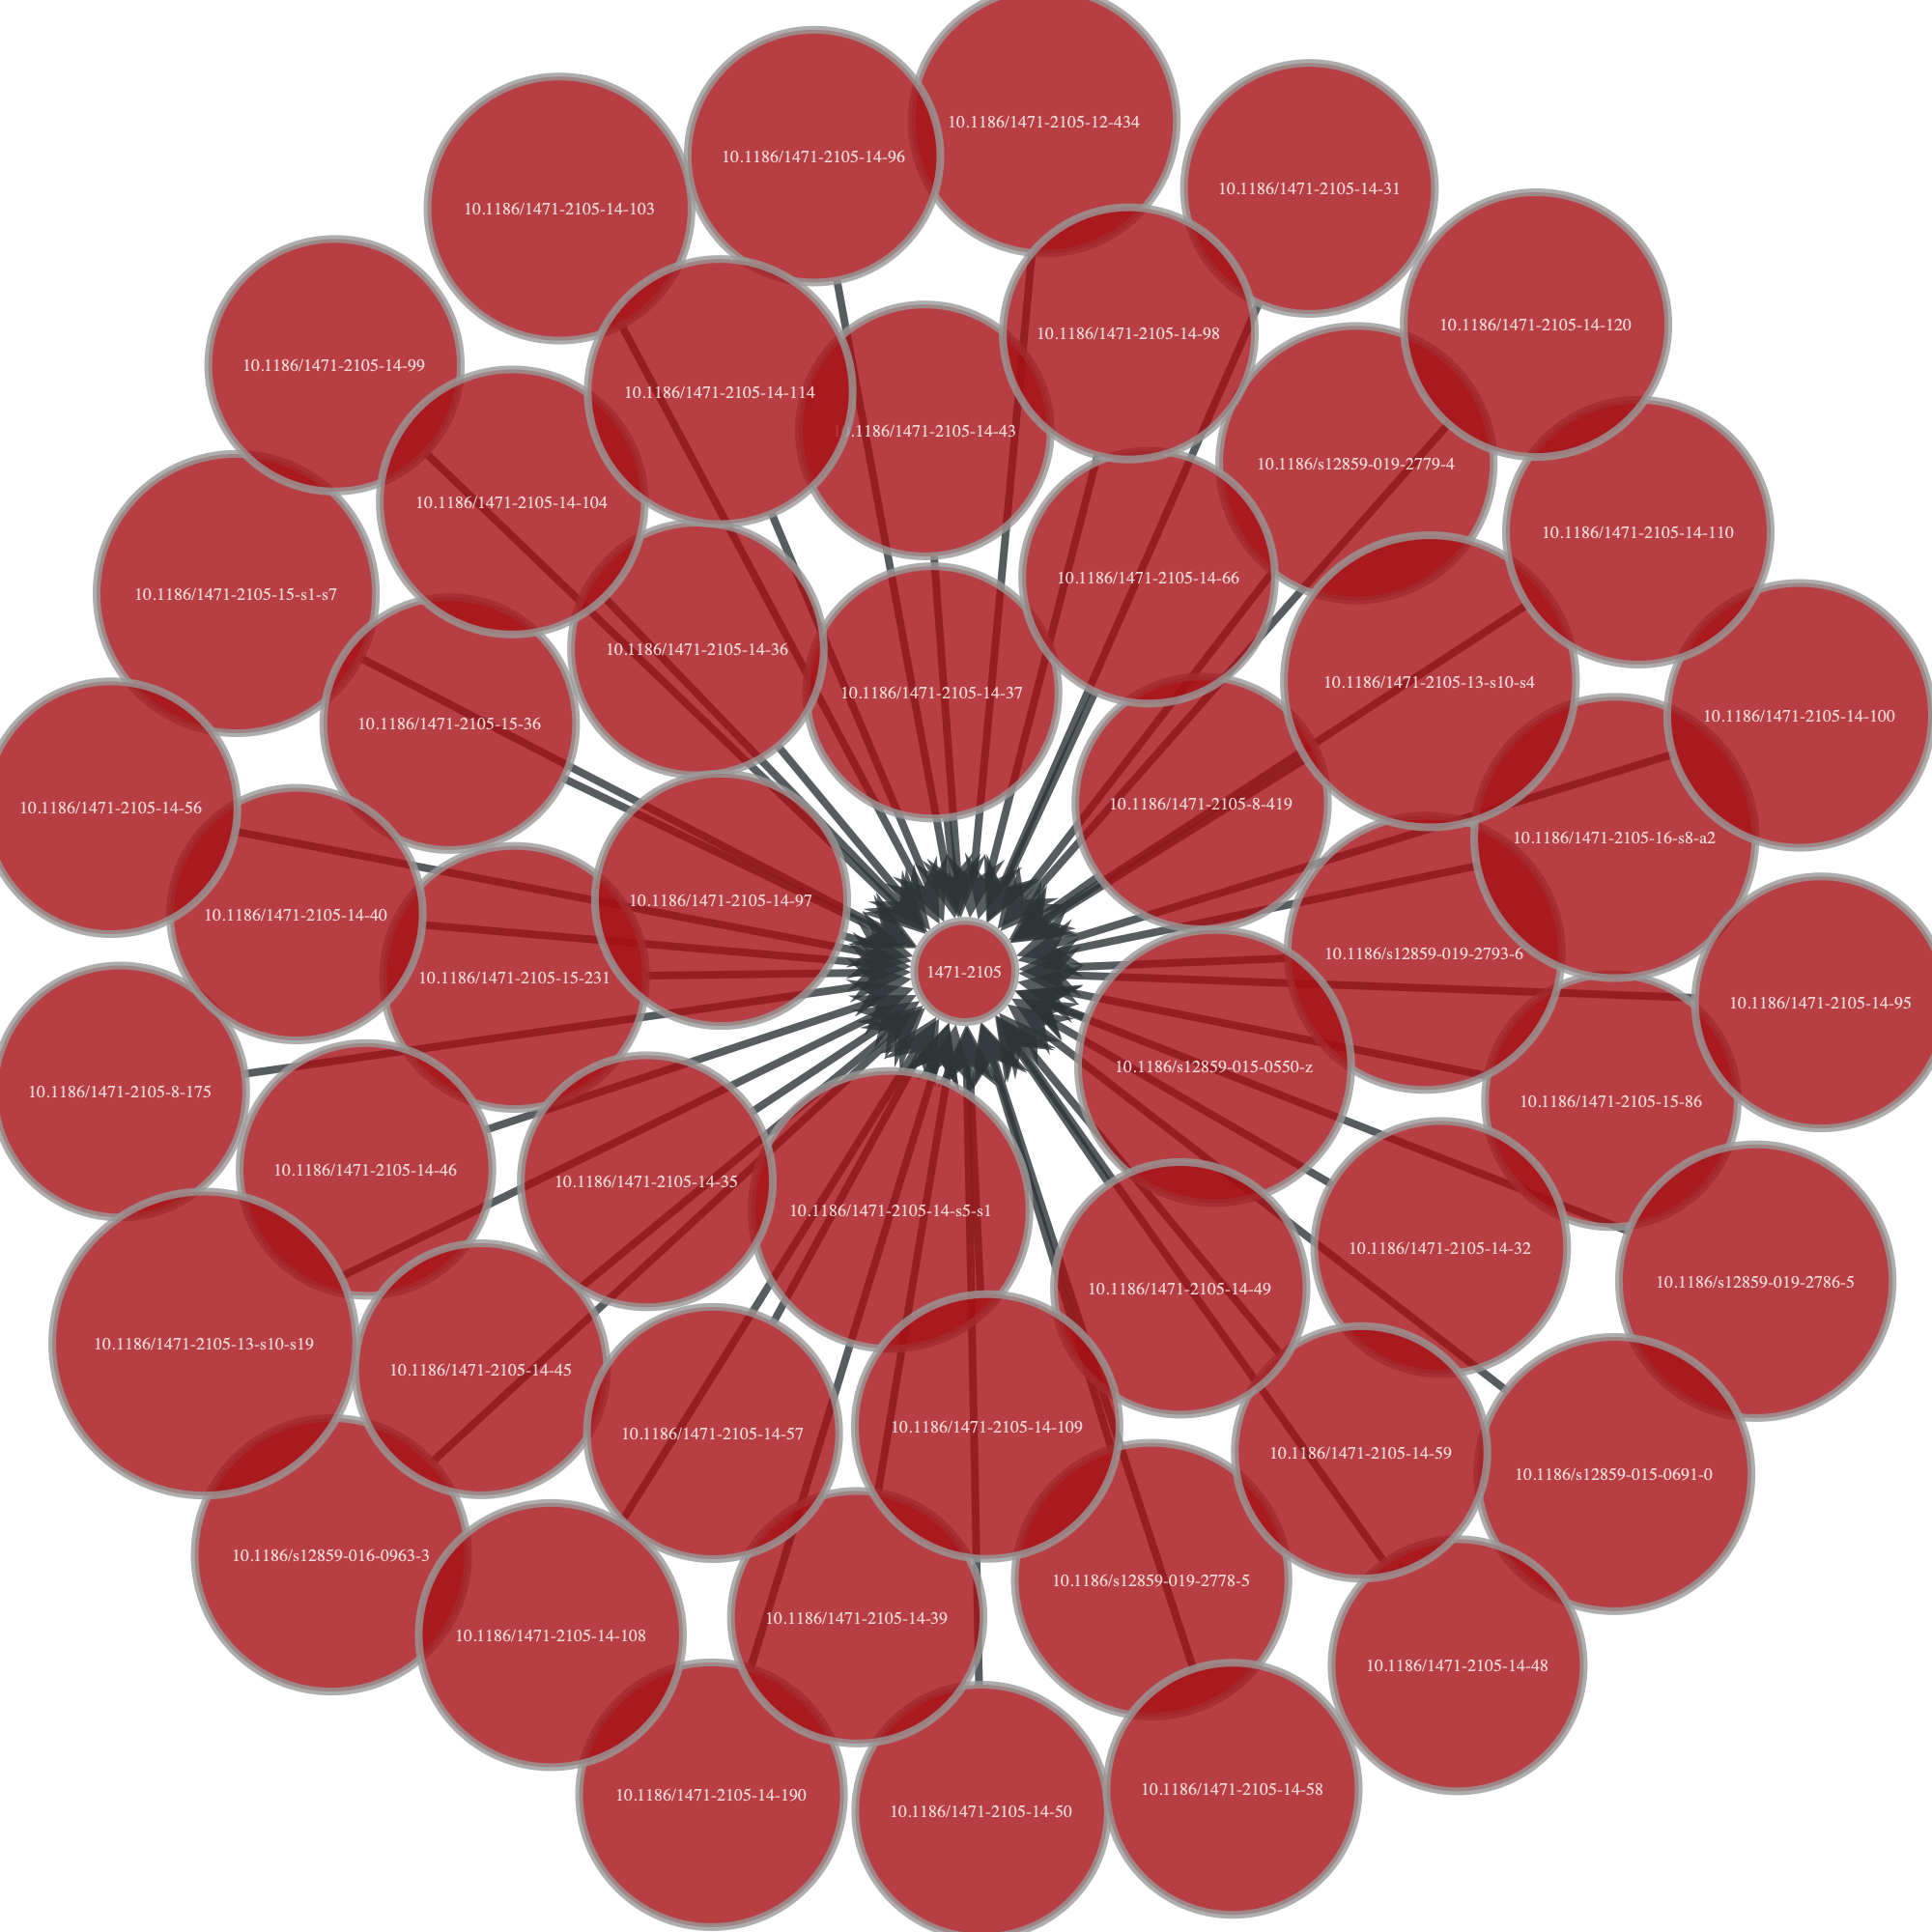

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x146ef0048, at 0x146ef0128>

In [8]:
journal_graph.vp.id = vertex_id
graph_draw(journal_graph, vertex_text = journal_graph.vp.id, 
           output_size = (2000,2000), vertex_font_size = 18, 
           bg_color = [1,1,1,1], inline = True)

In [51]:
item = cr.works(ids = "10.1186/s12859-019-2778-5")
pprint(item)

{'message': {'DOI': '10.1186/s12859-019-2778-5',
             'ISSN': ['1471-2105'],
             'URL': 'http://dx.doi.org/10.1186/s12859-019-2778-5',
             'alternative-id': ['2778'],
             'article-number': '189',
             'assertion': [{'group': {'label': 'Article History',
                                      'name': 'ArticleHistory'},
                            'label': 'Received',
                            'name': 'received',
                            'order': 1,
                            'value': '5 November 2018'},
                           {'group': {'label': 'Article History',
                                      'name': 'ArticleHistory'},
                            'label': 'Accepted',
                            'name': 'accepted',
                            'order': 2,
                            'value': '25 March 2019'},
                           {'group': {'label': 'Article History',
                                      'name': 'ArticleH

                                            'http://CRAN.R-project.org/package=glmnet\n'
                                            '                    \n'
                                            '                  .'},
                           {'DOI': '10.18637/jss.v033.i01',
                            'author': 'J Friedman',
                            'doi-asserted-by': 'publisher',
                            'first-page': '1',
                            'journal-title': 'J Stat Softw',
                            'key': '2778_CR3',
                            'unstructured': 'Friedman J, Hastie T, Tibshirani '
                                            'R. Regularization paths for '
                                            'generalized linear models via '
                                            'coordinate descent. J Stat Softw. '
                                            '2010; 33:1–22.',
                            'volume': '33',
                            

             'update-policy': 'http://dx.doi.org/10.1007/springer_crossmark_policy',
             'volume': '20'},
 'message-type': 'work',
 'message-version': '1.0.0',
 'status': 'ok'}


In [52]:
item = cr.members(ids = "10.1186/1471-2105-14-190")
item

TypeError: string indices must be integers

In [11]:
cr.works(query = "ecology", select = ["DOI", "reference"])

{'status': 'ok',
 'message-type': 'work-list',
 'message-version': '1.0.0',
 'message': {'facets': {},
  'total-results': 350026,
  'items': [{'DOI': '10.1007/springerreference_29611'},
   {'DOI': '10.1002/ecy.1807'},
   {'DOI': '10.2307/1928969'},
   {'DOI': '10.2307/1930158'},
   {'DOI': '10.2307/1931096'},
   {'DOI': '10.2307/1929908'},
   {'DOI': '10.2307/1943146'},
   {'DOI': '10.2307/1934287'},
   {'DOI': '10.2307/1935066'},
   {'DOI': '10.5040/9781474274685.ch-009'},
   {'DOI': '10.1002/9781444341966.ch14'},
   {'DOI': '10.1002/9780470979365.ch7'},
   {'DOI': '10.1002/9780470979365.ch2'},
   {'DOI': '10.1002/9780470979365.ch1'},
   {'DOI': '10.1002/9781118015841.ch5'},
   {'DOI': '10.4996/fireecology'},
   {'DOI': '10.5402/ecology'},
   {'DOI': '10.1155/8641'},
   {'DOI': '10.9774/gleaf.978-1-909493-30-8_29'},
   {'DOI': '10.1093/beheco/arq172'}],
  'items-per-page': 20,
  'query': {'start-index': 0, 'search-terms': 'ecology'}}}

In [12]:
label_largest_component(journal_graph)

<VertexPropertyMap object with value type 'bool', for Graph 0x146ef0048, at 0x146c6ccf8>

In [13]:
from webweb import Web
from os import listdir
from os.path import isfile, join
from halo import Halo
import re

# Get graph from file
def get_graph_from_folder():
	files = [f for f in listdir("./tmp/") if isfile(join("./tmp/",f)) and re.search(r"(.*\.gt)", f)]

	print("Graph Files Available")
	for i in range(len(files)):
		print(str(i) + " - " + files[i])

	file_to_load = files[int(input("Enter file number: "))]

	with Halo(text='Loading graph file...', spinner='dots'):
		graph = load_graph("./tmp/" + file_to_load)

	return graph

In [46]:
graph = get_graph_from_folder()

Graph Files Available
0 - network_graph.gt
1 - citation_graph_all.gt
2 - network_graph_500.gt
3 - citation_network_10000.gt
4 - citation_network_1000.gt
5 - network_graph_5000.gt
Enter file number: 3


In [47]:
edge_list = graph.get_edges()

display={
    "nodes" : {},
    'metadata' : {
        'type' : {
            'categories' : ['subject', 'journal', 'paper'],
        }
    },
}

for v in graph.get_vertices():
    node_values = {
        "id" : graph.vp.id[v],
        "name" : graph.vp.name[v],
        "type" : graph.vp.type[v]
    }
    display["nodes"][v] = node_values

In [48]:
web = Web(
    adjacency = edge_list,
    display = display
)

web.show()